# Task 6

## Student Information
 * Sandikha Rahardi
 * РИМ-130908

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

## Load Original Dataframe

In [2]:
filename_1 = '../data/[1]game_logs.csv'
filename_2 = '../data/[2]automotive.csv.zip'
filename_3 = '../data/[3]flights.csv'
filename_4 = '../data/[5]asteroid.zip'

In [ ]:
df_1 = pd.read_csv(filename_1)
df_2 = pd.read_csv(filename_2, compression='zip')
df_3 = pd.read_csv(filename_3)
df_4 = pd.read_csv(filename_4, compression='zip')

In [4]:
df_1.head(2)

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y


In [5]:
df_2.head(2)

,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,interiorColor,...,vf_VIN,vf_ValveTrainDesign,vf_VehicleType,vf_WheelBaseLong,vf_WheelBaseShort,vf_WheelBaseType,vf_WheelSizeFront,vf_WheelSizeRear,vf_Wheels,vf_Windows
0,abc5f0360059cf7b6fa8368db57f220ab0d87d582bf6ce...,11701A,2019-05-06,2019-05-06,1498,1498,0,False,Gray,NaN,...,abc5f0360059cf7b6fa8368db57f220ab0d87d582bf6ce...,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e24402cc77f6fd2d6a9dd626ad92795b717814340f1ab1...,9055B,2019-05-06,2019-05-06,10589,10589,0,False,Super Black,NaN,...,e24402cc77f6fd2d6a9dd626ad92795b717814340f1ab1...,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_3.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_4.head(2)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4,939.4,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.2,545.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936


## Calculate Memory Usage

In [8]:
def saveToJson(name, data):
    with open("../output/"+name, 'w', encoding='utf-8') as jsonFile:
        json.dump(data, jsonFile, indent=4, ensure_ascii=False)
        
def analyze_dataset(dataset, name):
    print(f"============== {name} ==============")
    # Analyze 1
    file_memory_usage = dataset.memory_usage().sum() / (1024 * 1024)  # size on MB
    print(f"File Memory Usage: {file_memory_usage:.2f} MB")
    
    # Analyze 2
    disk_memory_usage = dataset.memory_usage(deep=True).sum() / (1024 * 1024)  # size on MB
    print(f"Disk Memory Usage: {disk_memory_usage:.2f} MB")
    
    # Analyze 3
    column_stats = []
    for column in dataset.columns:
        col_memory = dataset[column].memory_usage(deep=True) / (1024 * 1024)
        col_dtype = str(dataset[column].dtype)
        col_stats = {
            "column": column,
            "memory_usage": col_memory,
            "fraction_of_total": col_memory / disk_memory_usage,
            "dtype": col_dtype
        }
        column_stats.append(col_stats)
    sorted_column_stats = sorted(column_stats, key= lambda x: x['memory_usage'])
    # Result to Json
    result_json = {
        "file_memory_usage": file_memory_usage,
        "disk_memory_usage": disk_memory_usage,
        "column_stats": sorted_column_stats
    }
    
    saveToJson(f"{name}.json", result_json)
    

In [9]:
analyze_dataset(df_1, "original-dataframe-1")
analyze_dataset(df_2, "original-dataframe-2")
analyze_dataset(df_3, "original-dataframe-3")
analyze_dataset(df_4, "original-dataframe-4")

============== original-dataframe-1 ==============
File Memory Usage: 211.16 MB
Disk Memory Usage: 859.43 MB
============== original-dataframe-2 ==============
File Memory Usage: 6740.11 MB
Disk Memory Usage: 29238.93 MB
============== original-dataframe-3 ==============
File Memory Usage: 1376.28 MB
Disk Memory Usage: 2655.75 MB
============== original-dataframe-4 ==============
File Memory Usage: 329.08 MB
Disk Memory Usage: 761.26 MB


## Optimization Dataframe

In [10]:
print("============== info-dataframe-1 ==============")
print(df_1.info())
print("============== info-dataframe-2 ==============")
print(df_2.info())
print("============== info-dataframe-3 ==============")
print(df_3.info())
print("============== info-dataframe-4 ==============")
print(df_4.info())

============== info-dataframe-1 ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 211.2+ MB
None
============== info-dataframe-2 ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695015 entries, 0 to 5695014
Columns: 156 entries, vin to vf_Windows
dtypes: bool(1), float64(52), int64(4), object(99)
memory usage: 6.6+ GB
None
============== info-dataframe-3 ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINA

In [11]:
def convert_object_to_categorical(dataset):
    for column in dataset.columns:
        if dataset[column].dtype == 'object':
            unique_values_count = dataset[column].nunique()
            total_entries = len(dataset[column])
            if unique_values_count / total_entries < 0.5:
                dataset[column] = dataset[column].astype('category')
                
def downcast_int_columns(dataset):
    int_columns = dataset.select_dtypes(include=['int64']).columns
    dataset[int_columns] = dataset[int_columns].apply(pd.to_numeric, downcast='integer')
    
def downcast_float_columns(dataset):
    float_columns = dataset.select_dtypes(include=['float64']).columns
    dataset[float_columns] = dataset[float_columns].apply(pd.to_numeric, downcast='float')
    
def convert_all(dataset):
    convert_object_to_categorical(dataset)
    downcast_int_columns(dataset)
    downcast_float_columns(dataset)

In [12]:
convert_all(df_1)
convert_all(df_2)
convert_all(df_3)
convert_all(df_4)

In [13]:
print("============== info-converted-dataframe-1 ==============")
print(df_1.info())
print("============== info-converted-dataframe-2 ==============")
print(df_2.info())
print("============== info-converted-dataframe-3 ==============")
print(df_3.info())
print("============== info-converted-dataframe-4 ==============")
print(df_4.info())

============== info-converted-dataframe-1 ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: category(78), float32(77), int16(2), int32(1), int8(3)
memory usage: 86.1 MB
None
============== info-converted-dataframe-2 ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695015 entries, 0 to 5695014
Columns: 156 entries, vin to vf_Windows
dtypes: bool(1), category(99), float32(52), int32(4)
memory usage: 2.1 GB
None
============== info-converted-dataframe-3 ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype   
---  ------               -----   
 0   YEAR                 int16   
 1   MONTH                int8    
 2   DAY                  int8    
 3   DAY_OF_WEEK          int8    
 4   AIRLINE              category
 5   FLIGHT_NUMBER        int16   
 6   TAIL_NUMBER      

In [14]:
analyze_dataset(df_1, "optimized-dataframe-1")
analyze_dataset(df_2, "optimized-dataframe-2")
analyze_dataset(df_3, "optimized-dataframe-3")
analyze_dataset(df_4, "optimized-dataframe-4")

============== optimized-dataframe-1 ==============
File Memory Usage: 86.15 MB
Disk Memory Usage: 102.19 MB
============== optimized-dataframe-2 ==============
File Memory Usage: 2124.02 MB
Disk Memory Usage: 2604.70 MB
============== optimized-dataframe-3 ==============
File Memory Usage: 483.05 MB
Disk Memory Usage: 483.39 MB
============== optimized-dataframe-4 ==============
File Memory Usage: 202.86 MB
Disk Memory Usage: 355.75 MB


## Pick 10 random columns

In [15]:
def select_random_columns(dataset, size, replaced=False):
    all_columns = dataset.columns
    selected_columns = np.random.choice(all_columns, size=size, replace=replaced)
    return selected_columns

def read_dataset_in_chunks(file_path, selected_columns, ziped=False):
    if ziped:
        chunks = pd.read_csv(file_path, usecols=selected_columns, chunksize=1000, compression='zip')
    else:
        chunks = pd.read_csv(file_path, usecols=selected_columns, chunksize=1000)
    
    processed_chunks = []
    for chunk in chunks:
        chunk.drop_duplicates()
        
        for column in selected_columns:
            if chunk[column].dtype == 'int64':
                replacement_na = pd.to_numeric(chunk[column]).fillna(0).mean() if pd.to_numeric(chunk[column]).fillna(0).mean() != 0 else 0
                chunk[column].fillna(replacement_na, inplace=True)
                chunk[column] = pd.to_numeric(chunk[column], downcast='integer')
            elif chunk[column].dtype == 'float64':
                replacement_na = pd.to_numeric(chunk[column]).fillna(0).mean() if pd.to_numeric(chunk[column]).fillna(0).mean() != 0.0 else 0.0
                chunk[column].fillna(replacement_na, inplace=True)
                chunk[column] = pd.to_numeric(chunk[column], downcast='float')
            else:
                chunk[column].fillna('unknown', inplace=True)
                chunk[column] = chunk[column].astype('category')
        processed_chunks.append(chunk)
    
    return pd.concat(processed_chunks, ignore_index=True)

def save_subset_to_file(subset, output_file):
    subset.to_csv(output_file, index=False)

In [16]:
output_file_1 = '../output/output_chunks_file_1.csv'
output_file_2 = '../output/output_chunks_file_2.csv'
output_file_3 = '../output/output_chunks_file_3.csv'
output_file_4 = '../output/output_chunks_file_4.csv'

selected_columns_df_1 = select_random_columns(df_1, size=10)
selected_columns_df_2 = select_random_columns(df_2, size=10)
selected_columns_df_3 = select_random_columns(df_3, size=10)
selected_columns_df_4 = select_random_columns(df_4, size=10)

subset_df_1 = read_dataset_in_chunks(filename_1, selected_columns_df_1)
subset_df_2 = read_dataset_in_chunks(filename_2, selected_columns_df_2, ziped=True)
subset_df_3 = read_dataset_in_chunks(filename_3, selected_columns_df_3)
subset_df_4 = read_dataset_in_chunks(filename_4, selected_columns_df_4, ziped=True)

save_subset_to_file(subset_df_1, output_file_1)
save_subset_to_file(subset_df_2, output_file_2)
save_subset_to_file(subset_df_3, output_file_3)
save_subset_to_file(subset_df_4, output_file_4)


## Visualization

### Dataframe 1

#### Line Plot - DF 1

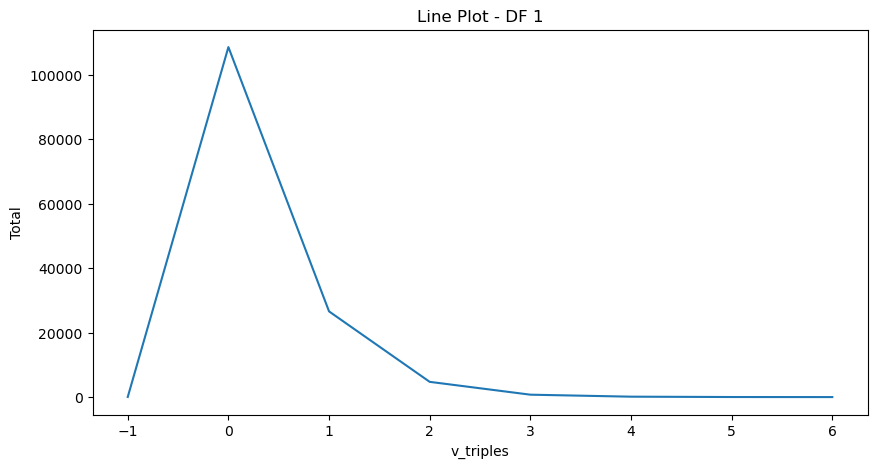

In [72]:
value_counts_line = df_1['v_triples'].value_counts().reset_index()
value_counts_line.columns = ['v_triples', 'Total']

plt.figure(figsize=(10, 5))
plt.title('Line Plot - DF 1')
sns.lineplot(x='v_triples', y='Total', data=value_counts_line)
plt.xlabel('v_triples')
plt.ylabel('Total')
plt.show()

#### Bar Plot - DF 1

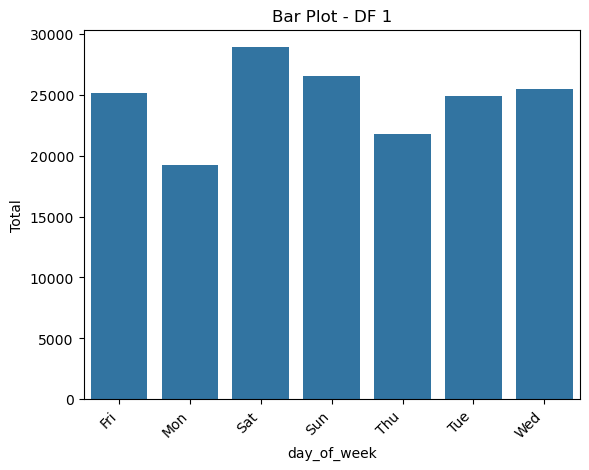

In [73]:
value_counts_bar = df_1['day_of_week'].value_counts().reset_index()
value_counts_bar.columns = ['day_of_week', 'Total']

ax = sns.barplot(x='day_of_week', y='Total', data=value_counts_bar)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel('day_of_week')
plt.ylabel('Total')
plt.title('Bar Plot - DF 1')
plt.show()

#### Heat Map - DF 1

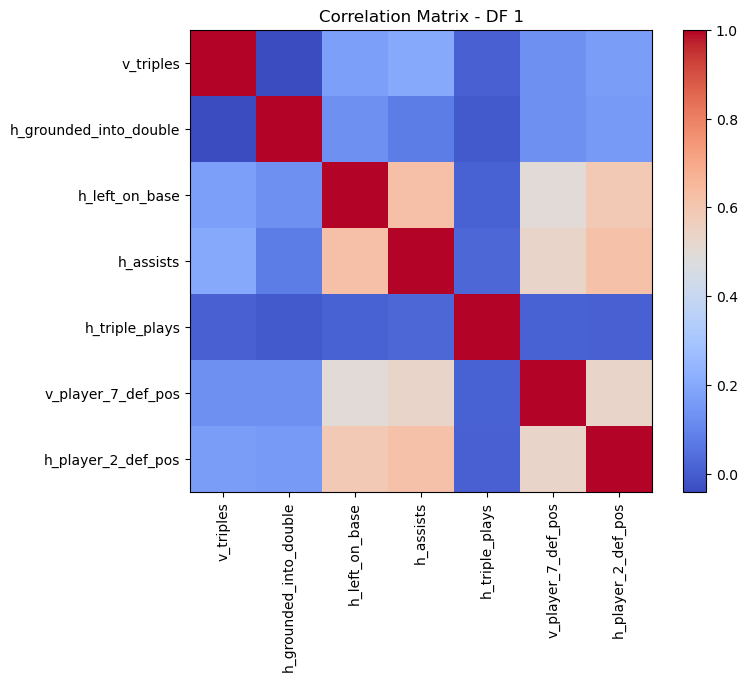

In [79]:
numeric_columns_df_1 = subset_df_1.select_dtypes(include=['int8', 'float32'])
correlation_matrix = numeric_columns_df_1.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix - DF 1')
plt.show()

#### Pie Chart - DF 1

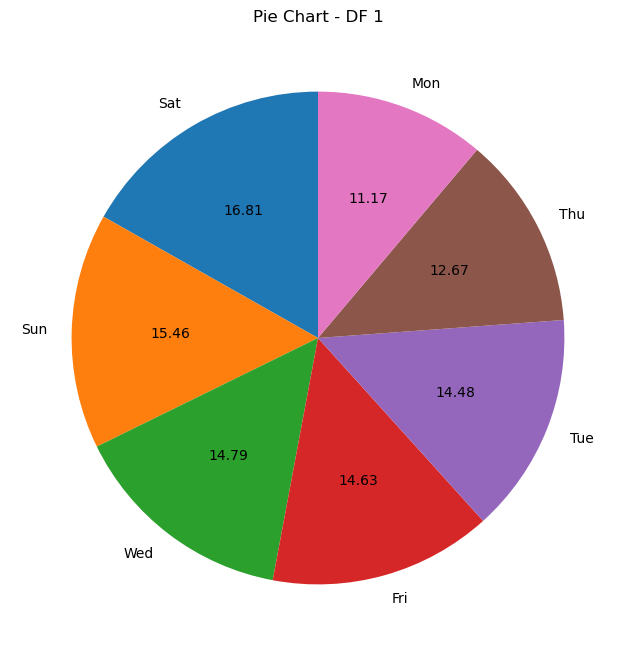

In [78]:
value_counts_pie = df_1['day_of_week'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts_pie, labels=value_counts_pie.index, autopct='%.2f', startangle=90)
plt.title('Pie Chart - DF 1')
plt.show()

#### Box Plot - DF 1

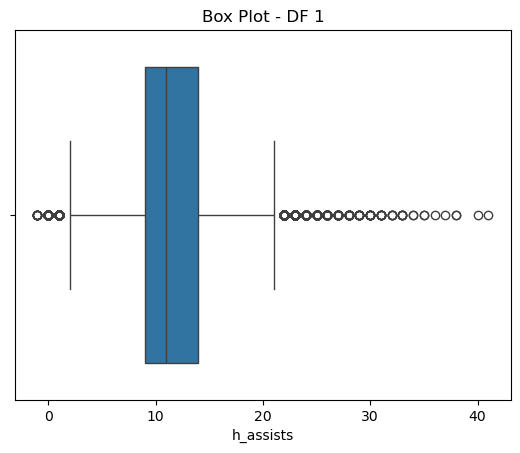

In [92]:
sns.boxplot(x=df_1['h_assists'])
plt.title('Box Plot - DF 1')
plt.xlabel('h_assists')
plt.show()